##  Project: Predicting Customer Churn 

### 1. Business Understanding

The analysis and prediction of customer chun plays a crucial role in the success and growth of businesses, particularly those operating in subscription-based or service-oriented industries. Retaining existing customers is often more cost-effective than acquiring new ones. Identifying and reducing churn can lead to increased cusomer lifetime value and sustained revenue streams. Churn analysis offers valuable business insights into customer behavior, preferences, and dissatisfaction. Understanding why customers leave can help businesses to enhance their products, services, and overall customer experience. Businesses that effectively predict and manage churn have a competitive advantage. They can implement proactive strategies to address churn, stay ahead of competitors, and maintain a loyal customer base. Predicting and reducing churn leads to improved customer satisfaction. Churn analysis promotes data driven decision-making. It allows businesses to objectively assees their performance, identify trends, and adapt strategies based on empirical evidence. In this project, I aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.


### Hypothesis
Null: There is no significant relationship between customer churn and subscribed contract term

Alternate: There is significant relationship between customer churn and chosen term of contract

### 2. Data Understanding

The data for this project is in a csv format. The following describes the columns present in the data.
Gender -- Whether the customer is a male or a female

SeniorCitizen -- Whether a customer is a senior citizen or not

Partner -- Whether the customer has a partner or not (Yes, No)

Dependents -- Whether the customer has dependents or not (Yes, No)

Tenure -- Number of months the customer has stayed with the company

Phone Service -- Whether the customer has a phone service or not (Yes, No)

MultipleLines -- Whether the customer has multiple lines or not

InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

MonthlyCharges -- The amount charged to the customer monthly

TotalCharges -- The total amount charged to the customer

Churn -- Whether the customer churned or not (Yes or No)

### Business Questions

1. How does gender impact customer churn? Are there significant differences in churn rates between male and female customers?

2. Does the presence of a partner or dependents influence customer churn? Is there a relationship betweeen marital status and churn behavior?

3. How does the length of tenure affect churn rates? Are customers with longer tenures less likely to churn compared to new customes?

4. What role do additional services(e.g., online security, tech support, streaming TV, etc.) play in reducing customer churn? Are customers with more services less likey to churn?

5. Is there a correlation between the contract term (month-to-month, one year, two years) and churn rates? Are customers on long-term contracts less likely to churn compared to those on month-to-month contracts?



Importation of all necessary Libraries

In [1]:
#Libraries
import pyodbc
from  dotenv import dotenv_values    #import dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
from scipy import stats
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

import pickle

warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)

Creation of environment variables to hide sensitive information and connect remotely to database


### 3. Data Preparation

### Data Loading

In [ ]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [ ]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [ ]:
# Now create the sql query to get the data is what what you see below. 

query1 = "Select * from  dbo.LP2_Telco_churn_first_3000"

In [ ]:
#Run the query wih aid of the connection and convert the target data_1 into a dataframe
data_1 = pd.read_sql(query1, connection)

In [ ]:
#Preview of the first five rows of the data_1 DataFrame 
data_1.head()

In [ ]:
#Information summary of data_1
data_1.info()

In [ ]:
#Loading of data_2
data_2 =pd.read_csv(r'C:\Users\WORLDAX COMPUTERS\Python Projects\LP_2-Data_Analytics_Project\Telecommunications-Churn-Analysis\Datasets\LP2_Telco-churn-last-2000.csv')
#Preview of first five rows in data_2
data_2.head() 

In [ ]:
#Information summary of Data_2
#This dataset doesn't have missing values
data_2.info()

In [ ]:
data_2.columns

In [ ]:
#Loading of the test data set
test_data = pd.read_excel(r'C:\Users\WORLDAX COMPUTERS\Python Projects\LP_2-Data_Analytics_Project\Telecommunications-Churn-Analysis\Datasets\Telco-churn-second-2000.xlsx')
#Preview of the first few rows
test_data.head(3)

In [ ]:
#Information summary of the test data
test_data.info()

Shapes of Dataframes

In [ ]:
print(data_1.shape, data_2.shape, test_data.shape)

## Exploratory Data Analysis: EDA

###  Data Cleaning

In [ ]:
# Compare the two training DataFrames, data_1 and data_2 side-by-side
#This dataframes form the training dataset

# Create custom summary DataFrames for each DataFrame
summary_data1 = pd.DataFrame({'Column Name': data_1.columns, 'Data Type': data_1.dtypes, 'Non-Null Count': data_1.count()})
summary_data2 = pd.DataFrame({'Column Name': data_2.columns, 'Data Type': data_2.dtypes, 'Non-Null Count': data_2.count()})

# Set 'Column Name' as the index for both summary DataFrames
summary_data1.set_index('Column Name', inplace=True) 
summary_data2.set_index('Column Name', inplace=True)

# Concatenate the two summary DataFrames side by side
comparison = pd.concat([summary_data1, summary_data2], axis=1, keys=['DataFrame 1', 'DataFrame 2'])

# Print the side-by-side comparison
print(comparison)

#There are different data types in the two columns
#Dataframe 2 has no missing values

In [ ]:
#Information summary of data_1
data_1.info()

In [ ]:
#A preview of data in columns
data_1.describe(include='all')

In [ ]:
#Check of unique values in each columnn of data_1
data_1.nunique()

Check of Missing Values in data_1 training data

data_1 has missing values

In [ ]:
# Create a loop to iterate over each column in the DataFrame
print('Count of missing values in data_1')
print()
for column in data_1.columns:
    # Use the 'isna()' method on the column to check for missing values
    missin_val = data_1[column].isna()

    # Calculate the sum of missin_val in the column
    missin_val_sum = missin_val.sum()

    # Check if any missin_val exist in the column
    if missin_val_sum > 0:
        print(f'Count of missing values in {column} column: {missin_val_sum}')


Check of Missing Values in data_2 training data

data_2 has no missing values

In [ ]:
# Create a loop to iterate over each column in the DataFrame
print('Count of missing values in data_2')
print()
for column in data_2.columns:
    # Use the 'isna()' method on the column to check for missing values
    missin_val = data_2.isna().sum()

    # Calculate the sum of missin_val in the column
    missin_val_sum = missin_val.sum()

    # Check if any missin_val exist in the column
    if missin_val_sum > 0:
        print(f'Count of missing values in {column} column: {missin_val_sum}')
    else:
        print(f'Count of missing values in {column} column: {missin_val_sum}')

Check of Missing Values in test_data for model evaluation

test_data has no missing values

In [ ]:
# Create a loop to iterate over each column in the DataFrame
print('Count of missing values in test_data')
print()
for column in test_data.columns:
    # Use the 'isna()' method on the column to check for missing values
    missin_val = test_data.isna().sum()

    # Calculate the sum of missin_val in the column
    missin_val_sum = missin_val.sum()

    # Check if any missin_val exist in the column
    if missin_val_sum > 0:
        print(f'Count of missing values in {column} column: {missin_val_sum}')
    else:
        print(f'Count of missing values in {column} column: {missin_val_sum}')

Handling Inconsistency

Cleaning data_1 and data_2 data_types to avoid inconsistency

I will clean one column at a time in both training dataframes


In [ ]:
#Comparison of the combined dataframe of data_1 and data_2
#Some columns have different data types in the training data
print(comparison)

### customerID column  

In [ ]:
#Preview of values in both column
data_1['customerID'].head(3)

#Both columns have consistent data of type object

In [ ]:
data_2['customerID'].head(3)

### gender column

In [ ]:
#Preview of both column elements
data_1['gender'].head(3)

Both columns are okay and have object datatype

In [ ]:
data_2['gender'].head(3)

### SeniorCitizen column

In [ ]:
#Preview of data in both column
data_1['SeniorCitizen'].tail(3)

Data_1 in this column is bool type and  data_2 column is an integer

In [ ]:
data_2['SeniorCitizen'].tail(3)

In [ ]:
#I will convert the integer datatype to boolean
data_2['SeniorCitizen'] = data_2['SeniorCitizen'].astype('bool')
#Are changes effected? Yeah!
data_2['SeniorCitizen'].tail(3)

### Partner column

In [ ]:
#Preview of data in both columns
data_1['Partner'].tail(3)

Data in both columns is inconsistent, data_1 is a bool type, whereas in data_2 is an object

In [ ]:
data_2['Partner'].tail(3)

In [ ]:
#Replace 'True', 'False' with 'Yes', 'No' respectively in data_1 to attain consistency
#This whether a cutomer has a partner or not. (Yes or No)
data_1['Partner'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Is the datatype changed? Yeah!
data_1['Partner'].head(3)

### Cleaning Dependents column

In [ ]:
#Preview of data in both columns
#Whether a partner has dependents or not(Yes or No)
data_1['Dependents'].tail(3)

Data_1 in this column is bool type and in data_2 is an object

In [ ]:
data_2['Dependents'].tail(3)

In [ ]:
#I will change data_1 column to object type for consistency
#Replace 'True', 'False' with  'Yes', 'No' respectively
data_1['Dependents'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Is the datatype changed? Positive!
data_1['Dependents'].tail(4)

### tenure column 

In [ ]:
#Preview of data in both tenure columns
data_1['tenure'].tail(3)

Tenure column is consistent in both dataframes, datatype is of int64

In [ ]:
data_2['tenure'].tail(3)

### Cleaning PhoneServices column

In [ ]:
#Preview of data in both columns
#Whether the customer has subscribed to receive phone services or not(Yes, No)
data_1['PhoneService'].head(3)

Data in both columns is inconsistent, in data_1 is of bool type, whereas in data_2 is an object

In [ ]:
data_2['PhoneService'].head(3)

In [ ]:
#I will change data_1 column to object type for consistency
#Replace 'True', 'False' with 'Yes', 'No'  respectively

data_1['PhoneService'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Is the change effective? yes!
data_1['PhoneService'].head(3)

### Cleaning MultipleLines column

data_1 multipleLines column has some missing values, whereas data_2 column doesn't

In [ ]:
#Count of missing values in data_1 MultipleLines column
data_1['MultipleLines'].isna().sum()

In [ ]:
#Preview of unique data in both columns
data_1['MultipleLines'].unique()

In [ ]:
data_1['MultipleLines'].value_counts()

In [ ]:
#Decided to impute missing in the column with mode value
#Mode value
multiplelines_mode = data_1['MultipleLines'].mode()[0]
#Replace missing values with the mode value
data_1['MultipleLines'].fillna(multiplelines_mode, inplace=True)
#Check whether there are any missing values left
data_1['MultipleLines'].isna().sum()

In [ ]:
#count data in data_1 after changes
data_1['MultipleLines'].value_counts()

In [ ]:
data_2['MultipleLines'].value_counts()

Data in both MultipleLines columns is inconsistent

In [ ]:
#Made assumption that an answer of 'No phone service' is the same as 'No' because the customer won't have even phone connection
#Replaced 'No phone service' with 'No'in the data_2 Multiplelines column
data_2['MultipleLines'].replace('No phone service', 'No', inplace=True)
#Check of data unique data count after changes
data_2['MultipleLines'].value_counts()

In [ ]:
#Replace 'True', 'False' with 'Yes', 'No' respectively in data_1 to achieve uniformity

data_1['MultipleLines'].replace({True: 'Yes', False : 'No'}, inplace=True)
#Is the data type change effective? yeah!
data_1['MultipleLines'].tail(5)

### InternetService column

In [ ]:
#Preview of data in both columns
data_1['InternetService'].unique() 

Data in both dataframe columns is consistent and are of object type. #Both Column are ok!

In [ ]:
data_2['InternetService'].unique() 

### Cleaning OnlineSecurity Column

Data_1 OnlineSecurity column has some missing values

In [ ]:
#Preview of data in both column
#Whether the client has online security or not
#Data in the columns is inconsistent, data_1 has categories 'True' and 'False', whereas data_2 has 'Yes' and 'No'
data_1['OnlineSecurity'].unique() 

In [ ]:
#data_1 Online security column has some missing values
data_1['OnlineSecurity'].isna().sum()

In [ ]:
#Count of unique numerical categories in data_1
data_1['OnlineSecurity'].value_counts()

In [ ]:
#Made an assumption that the missing null values is a response to third option 'No internet service'. 
data_1['OnlineSecurity'].fillna('No internet service', inplace=True)
#Check of changes made
data_1['OnlineSecurity'].value_counts()

In [ ]:
data_2['OnlineSecurity'].unique()

In [ ]:
#Count of unique numerical categories in data_2
data_2['OnlineSecurity'].value_counts()

In [ ]:
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['OnlineSecurity'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Is the change effective? yes!
data_1['OnlineSecurity'].tail(4)

### cleaning OnlineBackup column

In [ ]:
#Whether the customer has OnlineBackupor not (Yes, No, No internet service)
#Check of unique elements  in column
data_1['OnlineBackup'].unique() 

In [ ]:
#data_1 OnlineBackup Clumn has some missing values
data_1['OnlineBackup'].isna().sum()

In [ ]:
#Assumption made is that missing values represent the third option, 'No internet'
#Will fill missing values with 'No internet'
data_1['OnlineBackup'].fillna('No Internet', inplace=True)
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['OnlineBackup'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Are changes correct?
data_1['OnlineBackup'].value_counts()

In [ ]:
data_2['OnlineBackup'].unique() 

In [ ]:
#For consistency, I will replace 'No internet service' in data_2 with 'No Internet' respectively.
data_2['OnlineBackup'].replace({'No internet service':'No Internet'}, inplace=True)
#Is the change effective? yes!
data_2['OnlineBackup'].value_counts()

### Cleaning DeviceProtection column

In [ ]:
#Check of unique elements in both columns
data_1['DeviceProtection'].unique() 

In [ ]:
#data_1 DeviceProtection Column has some missing values
data_1['DeviceProtection'].isna().sum()

In [ ]:
data_2['DeviceProtection'].unique() 

In [ ]:
#Assumption made is that missing values represent the third option, 'No internet'
#Will fill missing values with 'No internet'
data_1['DeviceProtection'].fillna('No internet service', inplace=True)
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['DeviceProtection'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Are changes correct?
data_1['DeviceProtection'].value_counts()

### Cleaning TechSupport column

In [ ]:
#Check of unique elements in both columns
#Whether the customer has TechSupport or not (Yes, No, No internet service)
data_1['TechSupport'].unique() 
 

In [ ]:
#data_1 TechSupport Column has some missing values
data_1['TechSupport'].isna().sum()

In [ ]:
#There is some inconsistency in in both data
data_2['TechSupport'].unique() 

In [ ]:
#Assumption made is that missing values represent the third option, 'No internet'
#Will fill missing values with 'No internet'
data_1['TechSupport'].fillna('No Internet', inplace=True)
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['TechSupport'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Are changes correct?
data_1['TechSupport'].value_counts()

In [ ]:
#For consistency, I will replace 'No internet service' in data_2 with 'No Internet' respectively.
data_2['TechSupport'].replace({'No internet service':'No Internet'}, inplace=True)
#Is the change effective? yes!
data_2['TechSupport'].value_counts()

### StreamingTV column

In [ ]:
#Check of unique elements in both columns
data_1['StreamingTV'].unique() 

In [ ]:
#data_1 StreamingTV Column has some missing values
data_1['StreamingTV'].isna().sum()

In [ ]:
#Both columns have some inconsistency as well
data_2['StreamingTV'].unique()

In [ ]:
#Assumption made is that missing values represent the third option, 'No internet service'
#Will fill missing values with 'No internet'
data_1['StreamingTV'].fillna('No internet service', inplace=True)
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['StreamingTV'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Are changes correct?
data_1['StreamingTV'].value_counts()

### StreamingMovies column

In [ ]:
#Check of unique elements in both columns
data_1['StreamingMovies'].unique() 

In [ ]:
#data_1 StreamingTV Column has some missing values
data_1['StreamingMovies'].isna().sum()

In [ ]:
#Both columns have an inconsistency of having different data categories
data_2['StreamingMovies'].unique()

In [ ]:
#Assumption made is that missing values represent the third option, 'No internet service'
#Will fill missing values with 'No internet'
data_1['StreamingMovies'].fillna('No internet service', inplace=True)
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['StreamingMovies'].replace({True : 'Yes', False : 'No'}, inplace=True)
#Are changes correct?
data_1['StreamingMovies'].value_counts()

### Contract column

In [ ]:
#Check of unique elements in both columns
data_1['Contract'].unique() 

In [ ]:

#Both columns have consistent data values and are okay.
data_2['Contract'].unique()

### Cleaning PaperlessBilling column


In [ ]:
#Check of unique elements in both columns
data_1['PaperlessBilling'].unique() 


In [ ]:
#There are some minor differences in both columns
#Data_1 is a bool and data_2 is an Object

data_2['PaperlessBilling'].unique()

In [ ]:
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively.
data_1['PaperlessBilling'].replace({True: 'Yes', False: 'No'}, inplace=True)
#Is change effective? Great!
data_1['PaperlessBilling'].unique()

### PaymentMethod Column

In [ ]:
#Check of unique elements in both columns
data_1['PaymentMethod'].unique()

In [ ]:
#Both columns are consistent and have similar categories
data_2['PaymentMethod'].unique()

### Cleaning MonthlyCharges column

There is some inconsistency in rounding off

In [ ]:
#Check of few values in both columns
data_1['MonthlyCharges'].head()

In [ ]:
data_2['MonthlyCharges'].head()

In [ ]:
#I will round off data_1 column values to 2 decimal points to attain consistency
data_1['MonthlyCharges'] = data_1['MonthlyCharges'].round(2)
data_1['MonthlyCharges'].head(3)

### Cleaning TotalCharges column

There is some inconsistency in rounding off

data_1 Total charges column has 5 missing values

In [ ]:
#Count of missing values in the column
data_1['TotalCharges'].isna().sum()

In [ ]:
#Decided to drop the rows having missing data in my TotalCharges column - I have few missing values
data_1.dropna(subset='TotalCharges', inplace=True)
#Any remaining missing values?
data_1['TotalCharges'].isna().sum()

In [ ]:
#Check of few values in both columns
data_1['TotalCharges'].head(3)

In [ ]:
#I will round off data_1 values to 2 decimal points
data_1['TotalCharges'] = data_1['TotalCharges'].round(2)
data_1['TotalCharges'].head(3)

In [ ]:
data_2['TotalCharges'].head(3)

In [ ]:
#Conversion of data_2 'Totalcharges' from object to float
#pd.to_numeric method converts data from object to float

data_2['TotalCharges'] = pd.to_numeric(data_2['TotalCharges'], errors='coerce').astype(float)

# Round the values to 2 decimal places
data_2['TotalCharges'] = data_2['TotalCharges'].round(2)
data_2['TotalCharges'].head(5)

### Cleaning Churn column

In [ ]:
#Check of unique elements in both columns
data_1['Churn'].unique()

In [ ]:
#data_1 Churn Column has one missing value
data_1['Churn'].isna().sum()

In [ ]:
#Decided to drop the rows having missing data in the Churn column
data_1.dropna(subset='Churn', inplace=True)
#is the row with missing value dropped? Yeah!
data_1['Churn'].isna().sum()

In [ ]:
#A minor inconsistency is present, dataframe columns have different categories
data_2['Churn'].unique()

In [ ]:
#For consistency, I will replace 'True' and 'False' in data_1 with 'Yes' and 'No' respectively. 

data_1['Churn'].replace({True : 'Yes', False : 'No'}, inplace=True)
data_1['Churn'].unique()

In [ ]:
#Checking the two dataframes after cleaning
data_1.info()

In [ ]:
data_2.info()

In [ ]:
#Check of missing data in data_2 'TotalCharges' column

data_2['TotalCharges'].isna().sum()

In [ ]:
#I will drop the rows with the 3 missing values in data_2
data_2 = data_2.dropna(axis=0)
#Are changes correctly made? Correct!
data_2.info()

In [ ]:
#I will combine the two datasets(data_1 and data_2) into one dataset
df_combined = pd.concat([data_1, data_2], ignore_index=True)
#Will save a copy of combined data in my working directory

Handling inconsistency of datatypes between combined training set and test_data

In [ ]:
# Compare the two training DataFrames, data_1 and data_2 side-by-side
#This dataframes form the training dataset

# Create custom summary DataFrames for each DataFrame
summary_data3 = pd.DataFrame({'Column Name': df_combined.columns, 'Data Type': df_combined.dtypes, 'Non-Null Count': df_combined.count()})
summary_data4 = pd.DataFrame({'Column Name': test_data.columns, 'Data Type': test_data.dtypes, 'Non-Null Count': test_data.count()})

# Set 'Column Name' as the index for both summary DataFrames
summary_data3.set_index('Column Name', inplace=True) 
summary_data4.set_index('Column Name', inplace=True)

# Concatenate the two summary DataFrames side by side
comparison_1 = pd.concat([summary_data3, summary_data4], axis=1, keys=['DataFrame 3', 'DataFrame 4'])

# Print the side-by-side comparison
print(comparison_1)

#There are different data types in the training and test data columns
#dataframe4 has some missing values, and both have different data types in some columns

Harmonizing datatypes in both combined training data and tes_data

Columns 'SeniorCitizen' and 'TotalCharges' have different data types

In [ ]:
# One columns has an int64 datatype whereas the other is bool 
#column in training data
citizen_category_datatype3 = df_combined['SeniorCitizen'].dtypes
print(citizen_category_datatype3)

print()
#column in test_data

citizen_category_datatype4 = test_data['SeniorCitizen'].dtypes
print(citizen_category_datatype4)

Conversion of 'SeniorCitizen' column in test_data to bool type

In [ ]:
#conversion of SeniorCitizen column in test_data
if test_data['SeniorCitizen'].dtypes == 'int64':
        test_data['SeniorCitizen'] = test_data['SeniorCitizen'].astype(bool)
print(test_data['SeniorCitizen'].dtypes)    

Conversion of 'TotalCharges' column in test_data to float64 type

In [ ]:
# One columns has an int64 datatype whereas the other is bool 
#column in training data

# Data type of 'TotalCharges' column in training data
TotalCharges_datatype = df_combined['TotalCharges'].dtypes
print(TotalCharges_datatype)

print()

# Data type of 'TotalCharges' column in test data
TotalCharges_datatype_1 = test_data['TotalCharges'].dtypes
print(TotalCharges_datatype_1)

Harmonizing Columns 'TotalCharges' in both columns

In [ ]:
#conversion of SeniorCitizen column in test_data

if test_data['TotalCharges'].dtypes == 'object':
    test_data['TotalCharges'] = pd.to_numeric(test_data['TotalCharges'], errors='coerce')

print(test_data['TotalCharges'].dtypes)

Check of outliers in the test data

In [ ]:

# we have handled the null values in training data now lets look at the outliers
# lets Create a box plot to have a look at the outliers in the monthly charges attribute

# Create a figure with 1 row and 2 columns for the subplots
plt.figure(figsize=(12, 6))

# Create the first subplot for Monthly Charges
plt.subplot(1, 2, 1)
plt.boxplot(test_data['MonthlyCharges'])
plt.ylabel('Monthly Charges')
plt.title('Box Plot of Monthly Charges')

# Create the second subplot for Total Charges
plt.subplot(1, 2, 2)
plt.boxplot(test_data['TotalCharges'])
plt.ylabel('Total Charges')
plt.title('Box Plot of Total Charges')

# Show the plots
plt.show()

In [ ]:
# Calculate the 25th and 75th percentiles (Q1 and Q3) of TotalCharges
Q1 = test_data['TotalCharges'].quantile(0.25)
Q3 = test_data['TotalCharges'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers in TotalCharges
num_outliers = test_data[(test_data['TotalCharges'] < lower_bound) | (test_data['TotalCharges'] > upper_bound)].shape[0]

# Print the number of outliers
print("Number of outliers in TotalCharges:", num_outliers) 

In [ ]:
# Filtering of the outliers in TotalCharges column
test_data = test_data[(test_data['TotalCharges'] >= lower_bound) & (test_data['TotalCharges'] <= upper_bound)]

Check of missing values(NAN values) in test data

In [ ]:
#Total charges column has three missing values

missing_vals = test_data.isna().sum()
missing_vals

In [ ]:
# Drop rows with missing values from the test_data DataFrame
test_data = test_data.dropna()

# Print the shape of the cleaned DataFrame to see how many rows remain
print("Shape of test_data:", test_data.shape)

In [ ]:
# lets check whether the values match in both the training and test dataset to avoid errors during preprocessing
print(df_combined['SeniorCitizen'].value_counts())
print(test_data['SeniorCitizen'].value_counts())
print(df_combined['Partner'].value_counts())
print(test_data['Partner'].value_counts())
print(df_combined['Dependents'].value_counts())
print(test_data['Dependents'].value_counts())
print(df_combined['PhoneService'].value_counts())
print(test_data['PhoneService'].value_counts())
print(df_combined['MultipleLines'].value_counts())
print(test_data['MultipleLines'].value_counts())
print(df_combined['OnlineSecurity'].value_counts())
print(test_data['OnlineSecurity'].value_counts())
print(df_combined['DeviceProtection'].value_counts())
print(test_data['DeviceProtection'].value_counts())
print(df_combined['TechSupport'].value_counts())
print(test_data['TechSupport'].value_counts())
print(df_combined['StreamingTV'].value_counts())
print(test_data['StreamingTV'].value_counts())
print(df_combined['PaperlessBilling'].value_counts())
print(test_data['PaperlessBilling'].value_counts())
print(df_combined['InternetService'].value_counts())
print(test_data['InternetService'].value_counts())
print(df_combined['OnlineBackup'].value_counts())
print(test_data['OnlineBackup'].value_counts())
print(df_combined['StreamingMovies'].value_counts())
print(test_data['StreamingMovies'].value_counts())
print(df_combined['Contract'].value_counts())
print(test_data['Contract'].value_counts())
print(df_combined['PaymentMethod'].value_counts())
print(test_data['PaymentMethod'].value_counts())

Three category columns, namely, 'Multiplelines', 'Techsupport', and 'Online Backup' in test_data need matching with train dataset

Matching categories in Multiplelines

In [ ]:
#count data in df_combined dataframe
df_combined['MultipleLines'].value_counts()

In [ ]:
#count data in df_combined dataframe
test_data['MultipleLines'].value_counts()

In [ ]:
#I had made an assumption that an answer of 'No phone service' is the same as 'No', 
#This is because the customer won't have even phone connection to have Multiplelines
#Replaced 'No phone service' with 'No'in the data_2 training Multiplelines column

#Changes to test_data similar to one done in train set
test_data['MultipleLines'].replace('No phone service', 'No', inplace=True)
#Check of data unique data count after changes
test_data['MultipleLines'].value_counts()

Matching categories in Techsupport

In [ ]:
#count data in df_combined 'TechSupport' dataframe
df_combined['TechSupport'].value_counts()

In [ ]:
test_data['TechSupport'].value_counts()

In [ ]:

#For consistency, I will replace 'No internet service' in test_data with 'No Internet'.
test_data['TechSupport'].replace({'No internet service' : 'No Internet'}, inplace=True)
#Are changes correct?
test_data['TechSupport'].value_counts()

Matching categories in OnlineBackup

In [ ]:
#count data in df_combined 'TechSupport' dataframe
df_combined['OnlineBackup'].value_counts()

In [ ]:
#count data in test_data 'TechSupport' dataframe
test_data['OnlineBackup'].value_counts()

In [ ]:
#For consistency, I will replace 'No internet service' in test_data with 'No Internet'.
test_data['OnlineBackup'].replace({'No internet service' : 'No Internet'}, inplace=True)
#Is the change effective? yes!
test_data['OnlineBackup'].value_counts()

In [ ]:
#Saving copy of csv files to my working directory

df_combined.to_csv('Clean_Train_Data.csv', index=False)

test_data.to_csv('clean_test_data.csv', index=False)

Loading Combined Training Data

In [14]:
#Use of pandas pd.read_csv method
df = pd.read_csv(r'C:\Users\WORLDAX COMPUTERS\Python Projects\GRADIO_PROJECT\Datasets\Clean_Train_Data.csv')
test_data = pd.read_csv(r'C:\Users\WORLDAX COMPUTERS\Python Projects\GRADIO_PROJECT\Datasets\clean_test_data.csv')
#Preview of first few rows of the data
df.head(3)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,False,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,False,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [15]:
#Preview of information summary of my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5034 non-null   object 
 1   gender            5034 non-null   object 
 2   SeniorCitizen     5034 non-null   bool   
 3   Partner           5034 non-null   object 
 4   Dependents        5034 non-null   object 
 5   tenure            5034 non-null   int64  
 6   PhoneService      5034 non-null   object 
 7   MultipleLines     5034 non-null   object 
 8   InternetService   5034 non-null   object 
 9   OnlineSecurity    5034 non-null   object 
 10  OnlineBackup      5034 non-null   object 
 11  DeviceProtection  5034 non-null   object 
 12  TechSupport       5034 non-null   object 
 13  StreamingTV       5034 non-null   object 
 14  StreamingMovies   5034 non-null   object 
 15  Contract          5034 non-null   object 
 16  PaperlessBilling  5034 non-null   object 


In [16]:
#Description of numerical data in the columns(Measure of central tendency)
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,5034.000000,5034.000000,5034.000000
mean,32.620580,65.107251,2300.954758
std,24.511015,30.068019,2268.346401
min,1.000000,18.400000,18.800000
25%,9.000000,35.800000,417.662500
50%,29.000000,70.600000,1401.000000
75%,56.000000,90.050000,3860.600000
max,72.000000,118.650000,8670.100000


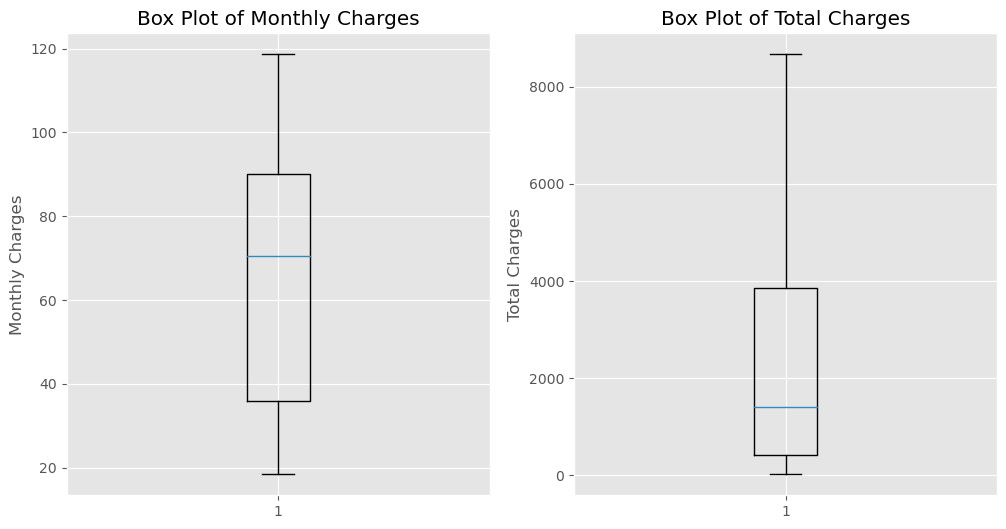

In [17]:
#Checking whether there are outliers in my numerical columns in combined data
# now lets look at the outliers
# lets Create a box plot to have a look at the outliers in the monthly charges attribute

# Create a figure with 1 row and 2 columns for the subplots
plt.figure(figsize=(12, 6))

# Create the first subplot for Monthly Charges
plt.subplot(1, 2, 1)
plt.boxplot(df['MonthlyCharges'])
plt.ylabel('Monthly Charges')
plt.title('Box Plot of Monthly Charges')

# Create the second subplot for Total Charges
plt.subplot(1, 2, 2)
plt.boxplot(df['TotalCharges'])
plt.ylabel('Total Charges')
plt.title('Box Plot of Total Charges')

# Show the plots
plt.show()             #There are no outliers

### Univariate Analysis

##### Distribution of Gender

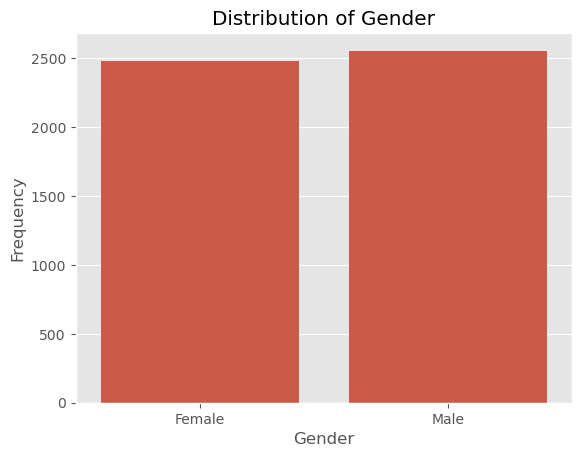

In [18]:
#Plot of Gender Distribution
sns.countplot(x=df['gender'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()

Gender distribution is almost even, with Males exceeding females by a very small margin.

##### Distribution Churn 

Distribution of Total Charges 

In [19]:
#Summary description
df['TotalCharges'].describe()

count    5034.000000
mean     2300.954758
std      2268.346401
min        18.800000
25%       417.662500
50%      1401.000000
75%      3860.600000
max      8670.100000
Name: TotalCharges, dtype: float64

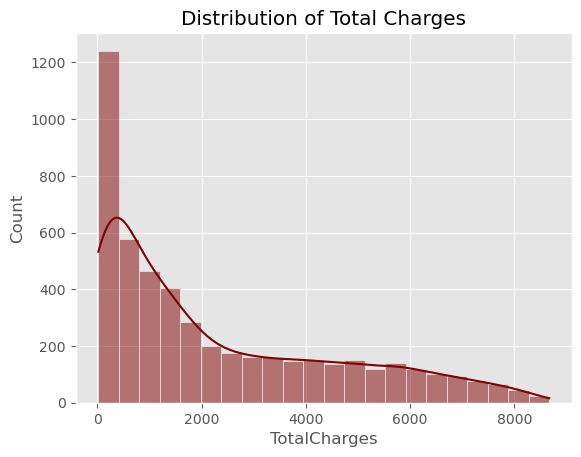

In [20]:
#Creation of a Histogram using seaborn
#sns.histplot(data=df['TotalCharges], kde=True)

sns.histplot(data=df['TotalCharges'], color='maroon', kde=True)
plt.title('Distribution of Total Charges');

The above visualization depicts that charges below 2000 had highest frequency and most charged to the customers of the telecommunications company. The total charged values are skewed and have high variability/range.

##### Distribution of Monthly Charges

In [21]:
#Description summary
df['MonthlyCharges'].describe()

count    5034.000000
mean       65.107251
std        30.068019
min        18.400000
25%        35.800000
50%        70.600000
75%        90.050000
max       118.650000
Name: MonthlyCharges, dtype: float64

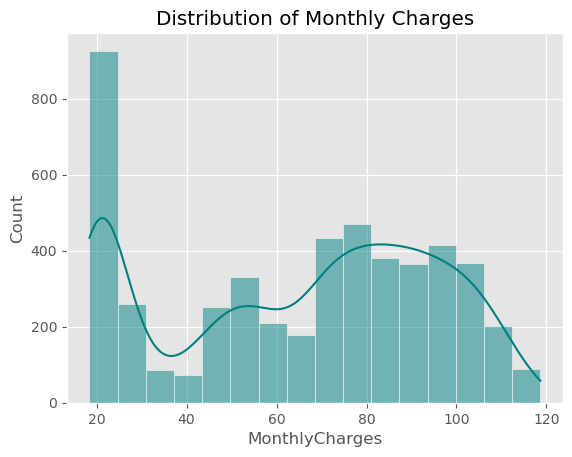

In [22]:
# Create the histogram plot of Monthly charges using seaborn

sns.histplot(data=df['MonthlyCharges'], color='teal', kde=True)
plt.title('Distribution of Monthly Charges');

Client Monthly charges of between 70 - 105 had the most consistent frequency for the telco company.

##### Distribution of Multiplelines 

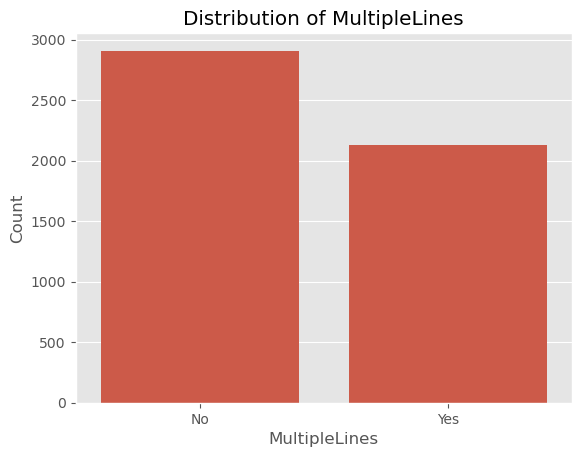

In [23]:
#Plot of Distribution on MultipleLines column
sns.countplot(x=df['MultipleLines'])
#plt.xlabel('Posession of MultipleLines')
plt.ylabel('Count')
plt.title('Distribution of MultipleLines')
plt.show()

Majority of the clients use only one line on their phones

Payment Method column

In [24]:
# Visualization of Payment Method column

PaymentMethod_Count = df['PaymentMethod'].value_counts().sort_values(ascending=True)
PaymentMethod_Count 

PaymentMethod
Credit card (automatic)      1089
Mailed check                 1123
Bank transfer (automatic)    1123
Electronic check             1699
Name: count, dtype: int64

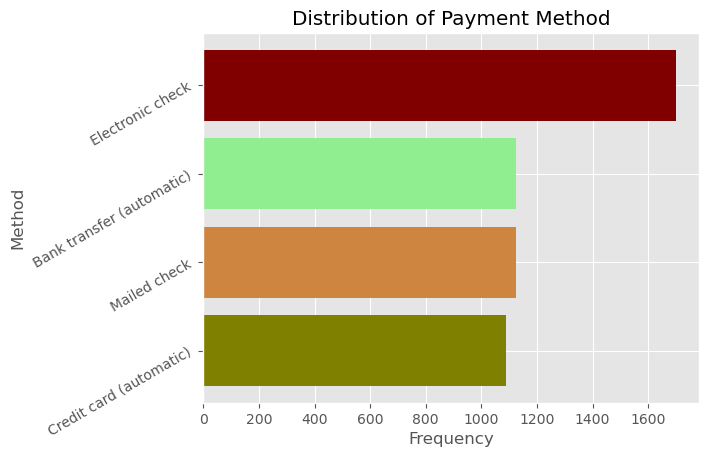

In [25]:
#Use of horizontal bar plot for visualization
c = ['olive', 'peru','lightgreen','maroon']
plt.barh(PaymentMethod_Count.index, PaymentMethod_Count.values, color=c)
plt.xlabel('Frequency')
plt.ylabel('Method')
plt.title('Distribution of Payment Method')
plt.yticks(rotation=30)
plt.show();

Vizualization shows us that majority of the customers preffered Electronic Check as a method of payment.

 ##### InternetService Column

In [26]:
# Visualization of InternetService column
df['InternetService'].replace('No', 'No Internet Service', inplace=True)

InternetService_Count = df['InternetService'].value_counts().sort_values(ascending=True)
InternetService_Count 

InternetService
No Internet Service    1077
DSL                    1710
Fiber optic            2247
Name: count, dtype: int64

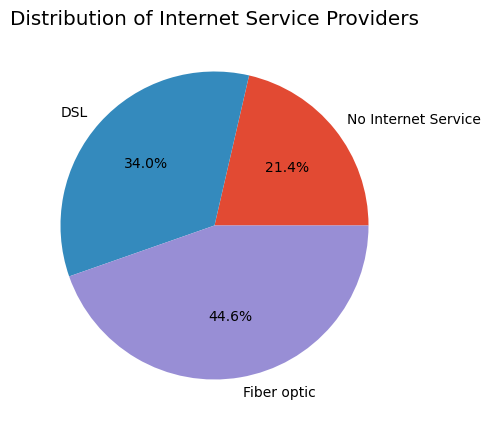

In [27]:
#Plotting a pie chart
#Should discuss with my team what'No' represents

plt.figure(figsize=(5, 5))
plt.pie(InternetService_Count, labels=InternetService_Count.index, autopct='%1.1f%%')
plt.title('Distribution of Internet Service Providers')
plt.show();

Majority of customer's preffered Fibre optic for internet service provision

 ##### Contract column

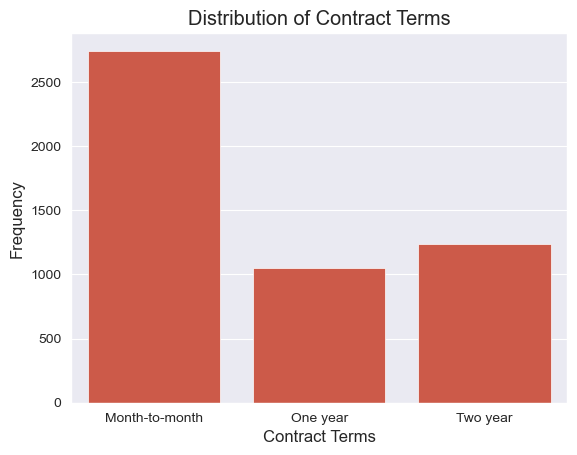

In [28]:
#Use of count plot for visualization
sns.set_style('darkgrid')
sns.countplot(data=df, x='Contract')
plt.xlabel('Contract Terms')
plt.ylabel('Frequency')
plt.title('Distribution of Contract Terms')
#plt.xticks(rotation=25)
plt.show();

Majority of clients preffered Month-to-month contract terms

##### Dependents column

In [29]:
#Vizualization of dependents using plotly.express

fig = px.pie(df, names='Dependents', title='Distribution of Dependents')
font_style = {'family':'Arial', 'size':18, 'color':'black'}
#customize title font
fig.update_layout(title_font=font_style, title_x=0.5)
#Customize text inside pie chart
fig.update_traces(textfont=font_style)
#Customize legend
fig.update_layout(legend=dict(font=dict(font_style)))
fig.show()

In [30]:
# Get the value counts of 'SeniorCitizen' column
senior_citizen_counts = df['SeniorCitizen'].value_counts()

# Create a DataFrame for plotting
data = pd.DataFrame({'Citizen': ['Non-Senior Citizen', 'Senior Citizen'],
                     'Count': senior_citizen_counts})

# Create a pie chart using plotly express
fig = px.pie(data, values='Count', names='Citizen',
             color_discrete_sequence=['#009ACD', '#ADD8E6'],
             title='Distribution of Senior Citizens')

# Move the title to the center
fig.update_layout(title_x=0.5)

# Show the plot
fig.show()

Majority of the customers had no dependents 

### Bivariate Analysis

In [31]:
#fig = px.violin(df, x='Dependents', y='TotalCharges', color='Dependents', points='all', box=True, title='Relationship between Tenure and Churn')
#show the plot#
#fig.show()

##### Relationship between total charges and tenure

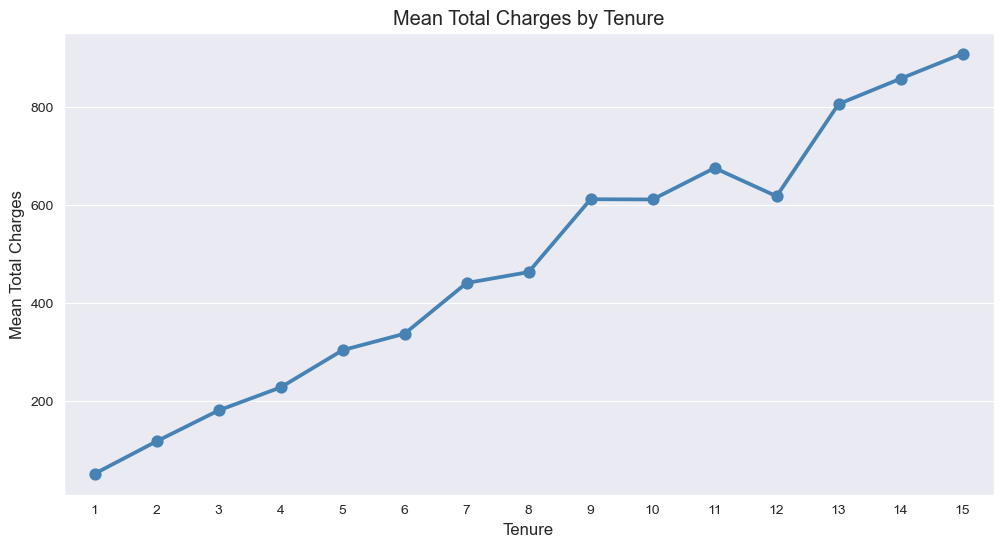

In [32]:
# Grouping by 'tenure' and calculating the mean 'TotalCharges'
df_grp_tenure = df.groupby('tenure')['TotalCharges'].mean().reset_index()

#Top 15 data points
df_grp_tenure_15 = df_grp_tenure.head(15)

# Create a point plot
plt.figure(figsize=(12, 6))
sns.pointplot(data=df_grp_tenure_15, x='tenure', y='TotalCharges', color='steelblue')

# Customize the plot
plt.title('Mean Total Charges by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Mean Total Charges')

# Show the plot
plt.show()

Check on collinearity. There is a strong collinearity between tenure and Total charges.

##### Relationship of Tenure and Churn 

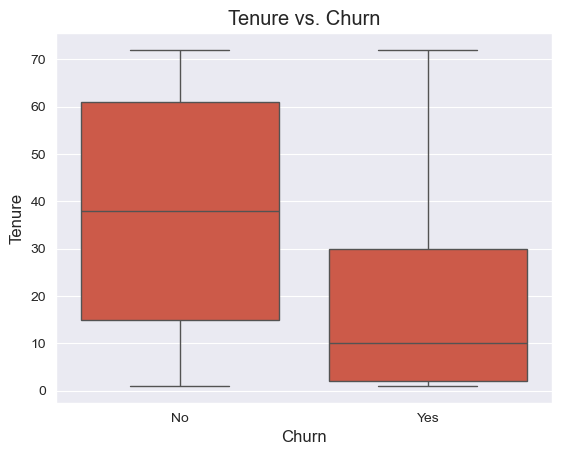

In [33]:
#  Bivariate Analysis - Tenure vs. Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

The visualization shows that clients with a lower tenure had the highest likelihood to churn

##### Monthly charges vs Tenure

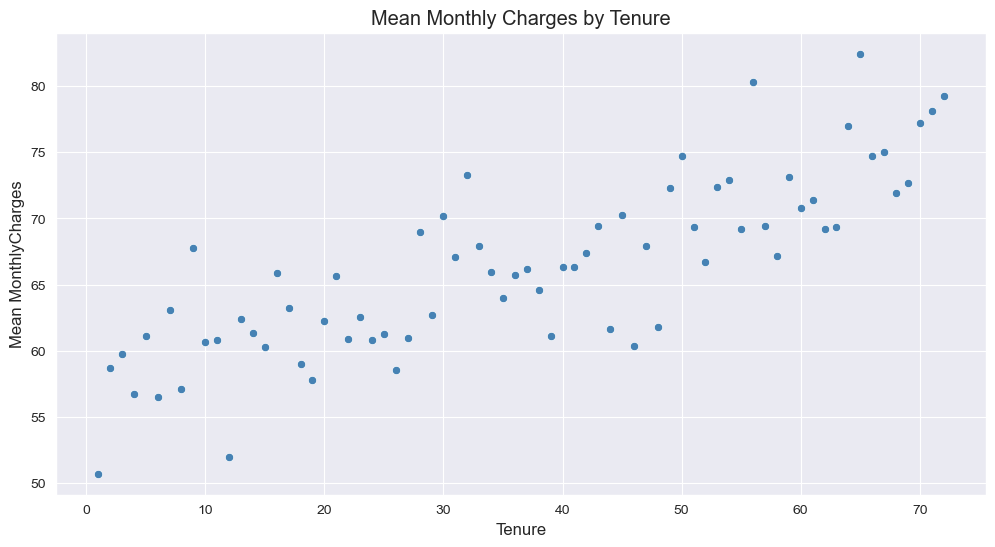

In [34]:
# Grouping by 'tenure' and calculating the mean 'MonthlyCharges'
df_grp_tenure = df.groupby('tenure')['MonthlyCharges'].mean().reset_index()

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_grp_tenure, x='tenure', y='MonthlyCharges', color='steelblue')

# Customize the plot
plt.title('Mean Monthly Charges by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Mean MonthlyCharges')

# Show the plot
plt.show()

There is a linear relationship between tenure and Monthly charges. Clients who are loyal and had a long tenure made higher monthly purchases from the telecommunications company.

##### Contract vs Churn rate

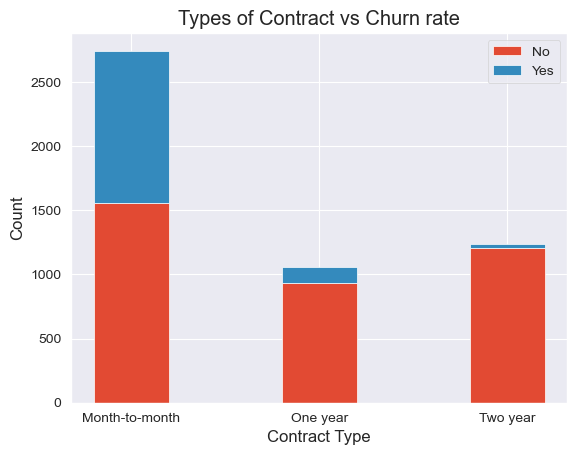

In [35]:
# Grouping and counting occurrences of each combination
grouped_df = df.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
fig, ax = plt.subplots()

index = range(len(grouped_df))
width = 0.4

bars = []
bottom = [0] * len(grouped_df)

for churn_status in grouped_df.columns:
    bar = ax.bar(index, grouped_df[churn_status], width, bottom=bottom, label=churn_status)
    bars.append(bar)
    bottom = [bottom[i] + grouped_df[churn_status][i] for i in range(len(grouped_df))]

ax.set_xlabel('Contract Type')
ax.set_ylabel('Count')
ax.set_title('Types of Contract vs Churn rate')
ax.set_xticks(index)
ax.set_xticklabels(grouped_df.index)
ax.legend()

plt.show()

Most clients subscribed to monthly terms of contract and also they were the majority who churned. Clients on a Two year contract had very low churn rate.

### Multivariate Analysis

Rekationship between Monthly charges, Contract terms, and churn

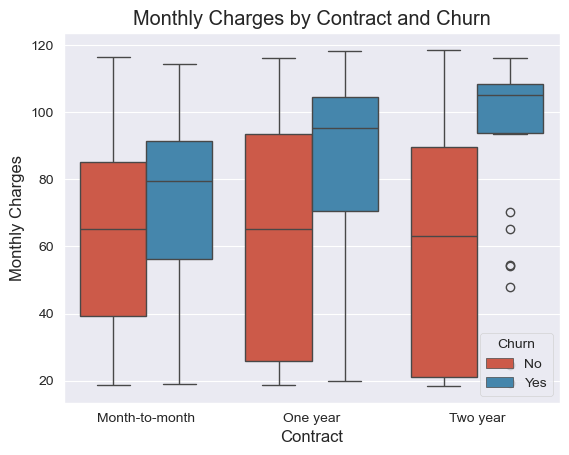

In [36]:
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Monthly Charges by Contract and Churn')
plt.xlabel('Contract')
plt.ylabel('Monthly Charges')
plt.show()

The box plot that helps visualize how the monthly charges are distributed across different types of contracts, considering the churn status of customers. The plot provides insights into whether there are significant variations in monthly charges based on contract types and churn behavior

relationship between numeric columns in Training data

In [37]:
#selection of numeric columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

numerical_columns.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

<AxesSubplot: >

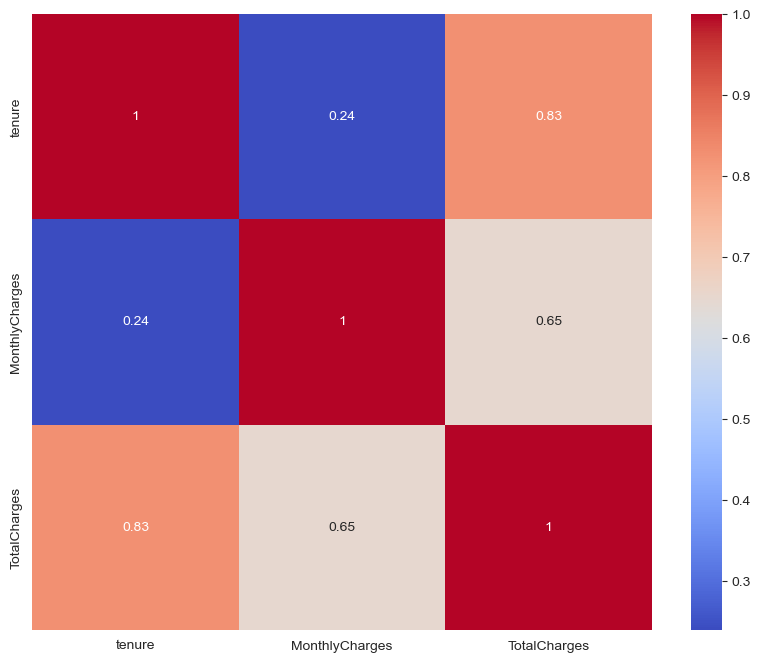

In [38]:
#relationship between numeric columns
#The .corr() method computes the Pearson correlation coefficients between all pairs of numerical columns
correlation = numerical_columns.corr()

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap= 'coolwarm')#'icefire_r')


In [39]:
# performing feature selection
coff=abs(correlation['tenure'])
coff=coff[coff>0.02]
coff.sort_values(ascending=False)

tenure            1.000000
TotalCharges      0.826188
MonthlyCharges    0.239642
Name: tenure, dtype: float64

The number of months the customer has stayed with the company(tenure) has high correlation of 0.83 with the total amount charged to the customer(TotalCharges) when compared to the amount charged to the customer monthly(MonthlyCharges). Hence, the tenure period of a customers is determined by long term charges compared to monthly charges

Hypothesis Testing

In [40]:
gc=pd.crosstab(df.Contract,df.Churn)
gc

Churn,No,Yes
Contract,,
Month-to-month,1560,1184
One year,932,122
Two year,1206,30


In [41]:
chi_2,p_value,gol,frequency=chi2_contingency(gc,correction=False)
alpha=0.05
print('level of significance=%.2f,p_value=%.2f,chi_2=%.2f'%(alpha,p_value,chi_2))

level of significance=0.05,p_value=0.00,chi_2=877.93


Since the p-value is less than alpha, we reject Ho and conclude that is there is a statistical significance association between Churn and Contract

VISUALIZING ANSWERS TO BUSINESS QUESTIONS

##### 1.How does gender impact customer churn? Are there siginificant differences in churn rates between male and female customers?

In [42]:
# Since the  gender column contains 'Male' and 'Female', convert it to categorical data
df['gender'] = pd.Categorical(df['gender'])

#'Churn' column contains non-numeric values like 'Yes' and 'No'
# Convert 'churn' column to binary numeric values (0 for 'No', 1 for 'Yes')
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [43]:
# Grouping by 'gender' and summing the 'Churn' column for each group
grouped_churn_sum = df.groupby('gender')['Churn'].sum()

# Getting the grouped sum of clients who will not churn
grouped_no_churn_sum = df.groupby('gender')['Churn'].apply(lambda x: (x == 0).sum())

# Getting the grouped sum of clients who will churn
grouped_yes_churn_sum = df.groupby('gender')['Churn'].apply(lambda x: (x == 1).sum())

# Displaying the results
print("Grouped sum of clients who will churn:")
print(grouped_yes_churn_sum)

print("\nGrouped sum of clients who will not churn:")
print(grouped_no_churn_sum)

Grouped sum of clients who will churn:
gender
Female    661
Male      675
Name: Churn, dtype: int64

Grouped sum of clients who will not churn:
gender
Female    1819
Male      1879
Name: Churn, dtype: int64


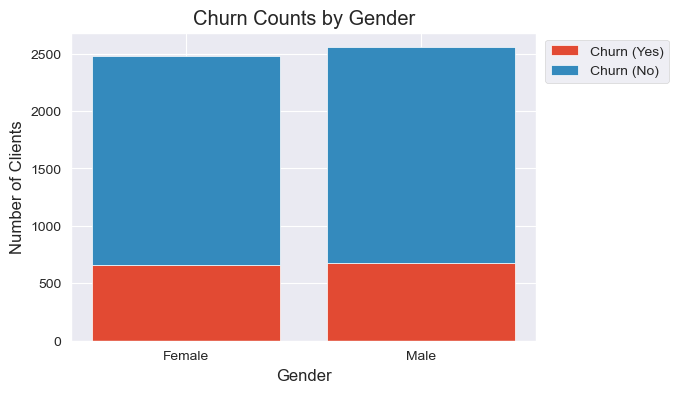

In [44]:
# List of genders for x-axis labels
genders = grouped_churn_sum.index

# Plotting the stacked bar chart
plt.figure(figsize=(6, 4))
plt.bar(genders, grouped_yes_churn_sum, label='Churn (Yes)')
plt.bar(genders, grouped_no_churn_sum, bottom=grouped_yes_churn_sum, label='Churn (No)')

plt.xlabel('Gender')
plt.ylabel('Number of Clients')
plt.title('Churn Counts by Gender')
plt.legend()

# Moving the legend outside of the bar plot
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.show()

Churn count between male and female is almost even

##### 2. Does the presence of a partner or dependents influence customer churn? Is there a relationship betweeen marital status and churn behavior?

In [45]:
Churn_rates_by_partner = df.groupby('Partner')['Churn'].mean()

Churn_rates_by_dependents = df.groupby('Dependents')['Churn'].mean()

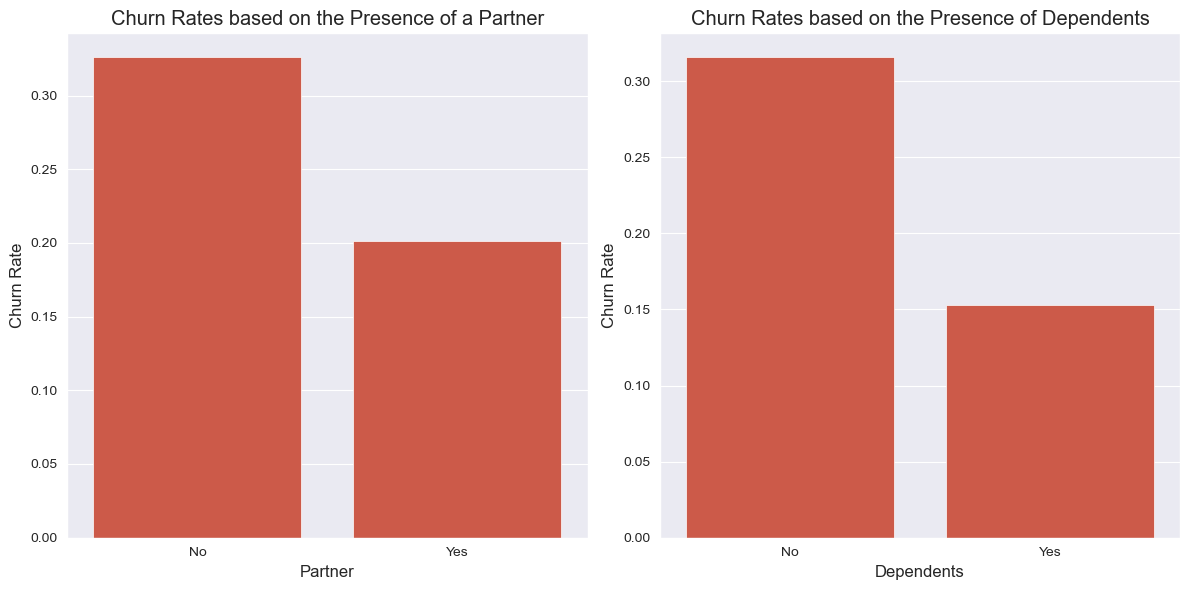

In [46]:
# Create a figure with two subplots arranged horizontally
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot churn rates based on the presence of a partner
sns.barplot(x=Churn_rates_by_partner.index, y=Churn_rates_by_partner.values, ax=ax1)
ax1.set_title('Churn Rates based on the Presence of a Partner')
ax1.set_xlabel('Partner')
ax1.set_ylabel('Churn Rate')

# Plot churn rates based on the presence of dependents
sns.barplot(x=Churn_rates_by_dependents.index, y=Churn_rates_by_dependents.values, ax=ax2)
ax2.set_title('Churn Rates based on the Presence of Dependents')
ax2.set_xlabel('Dependents')
ax2.set_ylabel('Churn Rate')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Customers with dependents had lower rate of churn.

Clients without partners had higher rate of churn compared to those with partner.

##### 3.How does the length of tenure affect churn rates? Are customers with longer tenures less likely to churn compared to new customes?

In [47]:
#'Tenure' column contains the length of tenure in months
# Create bins for tenure categories (e.g., 0-6 months, 7-12 months, etc.)
tenure_bins = [0, 6, 12, 24, 36, 48, 60, 1000]  # Adjust the bins as needed
tenure_labels = ['0-6 months', '7-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '61+ months']
df['tenure_category'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels)

# Calculate churn rates for each tenure category
Churn_rates_by_tenure = df.groupby('tenure_category')['Churn'].mean()

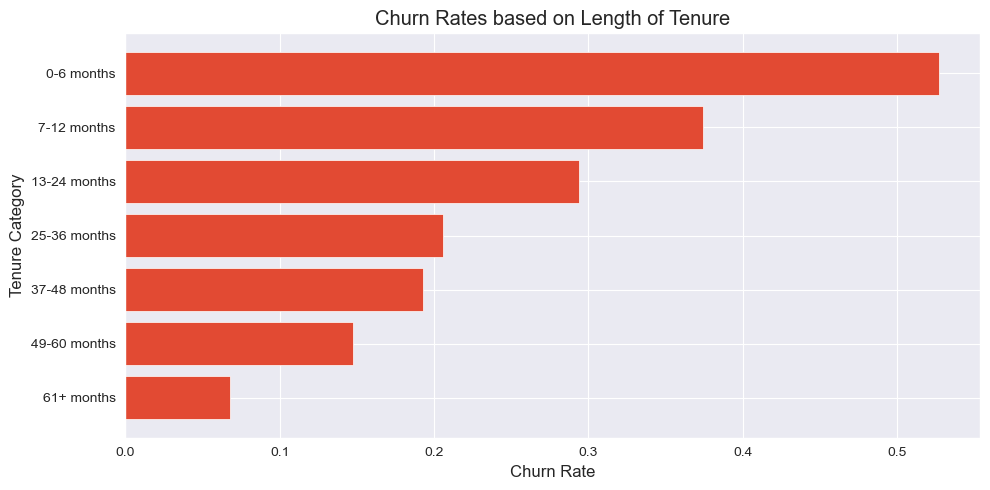

In [48]:
# # Vizualization of Churn rates based on the length of tenure

plt.figure(figsize=(10, 5))
plt.barh(Churn_rates_by_tenure.index,Churn_rates_by_tenure.values)
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest bar on top


plt.xlabel('Churn Rate')
plt.ylabel('Tenure Category')
plt.title('Churn Rates based on Length of Tenure')
plt.tight_layout()  
plt.show();

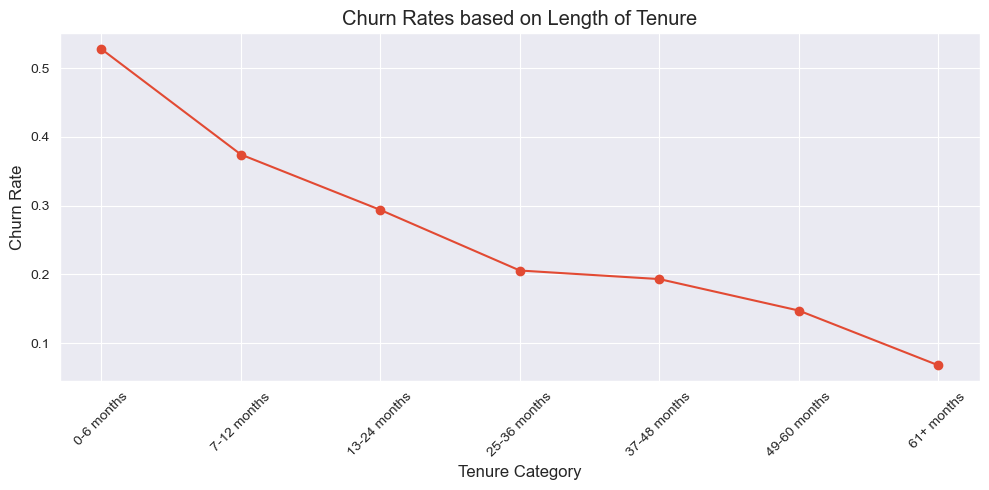

In [49]:
# # Vizualization of Churn rates based on the length of tenure
plt.figure(figsize=(10, 5))
plt.plot(Churn_rates_by_tenure.index, Churn_rates_by_tenure.values, marker='o')
plt.xlabel('Tenure Category')
plt.ylabel('Churn Rate')
plt.title('Churn Rates based on Length of Tenure')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)  # Add grid lines
plt.tight_layout()# To prevent the labels from getting cut off
plt.show()


Clients who had subscribed to company services for less than a year had highest rate of attrition.

##### 4. What role do additional services(e.g., online security, tech support, streaming TV, etc.) play in reducing customer churn? Are customers with more services less likey to churn?

In [50]:
# Create bins for service categories (e.g., 0, 1, 2, etc.)
#Assumption made is that customers without internet service have no access to additional services, hence mapped 'No internet service' with 0
service_bins = [-1, 0, 1]  # Two categories: 0 for "No service", 1 for "Has service"
service_labels = ['No service', 'Has service']
df['Service_category_OnlineSecurity'] = pd.cut(df['OnlineSecurity'].map({'No internet service':0, 'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)
df['Service_category_TechSupport'] = pd.cut(df['TechSupport'].map({'No Internet':0, 'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)
df['Service_category_StreamingTV'] = pd.cut(df['StreamingTV'].map({'No internet service':0, 'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)
df['Service_category_StreamingMovies'] = pd.cut(df['StreamingMovies'].map({'No internet service':0, 'No internet service':0, 'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)
df['Service_category_OnlineBackup'] = pd.cut(df['OnlineBackup'].map({'No Internet':0, 'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)
df['Service_category_DeviceProtection'] = pd.cut(df['DeviceProtection'].map({'No internet service':0, 'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)

# Calculate churn rates for each service category
churn_rates_by_OnlineSecurity = df.groupby('Service_category_OnlineSecurity')['Churn'].mean()
churn_rates_by_TechSupport = df.groupby('Service_category_TechSupport')['Churn'].mean()
churn_rates_by_StreamingTV = df.groupby('Service_category_StreamingTV')['Churn'].mean()
churn_rates_by_StreamingMovies = df.groupby('Service_category_StreamingMovies')['Churn'].mean()
churn_rates_by_OnlineBackup = df.groupby('Service_category_OnlineBackup')['Churn'].mean()
churn_rates_by_DeviceProtection = df.groupby('Service_category_DeviceProtection')['Churn'].mean()

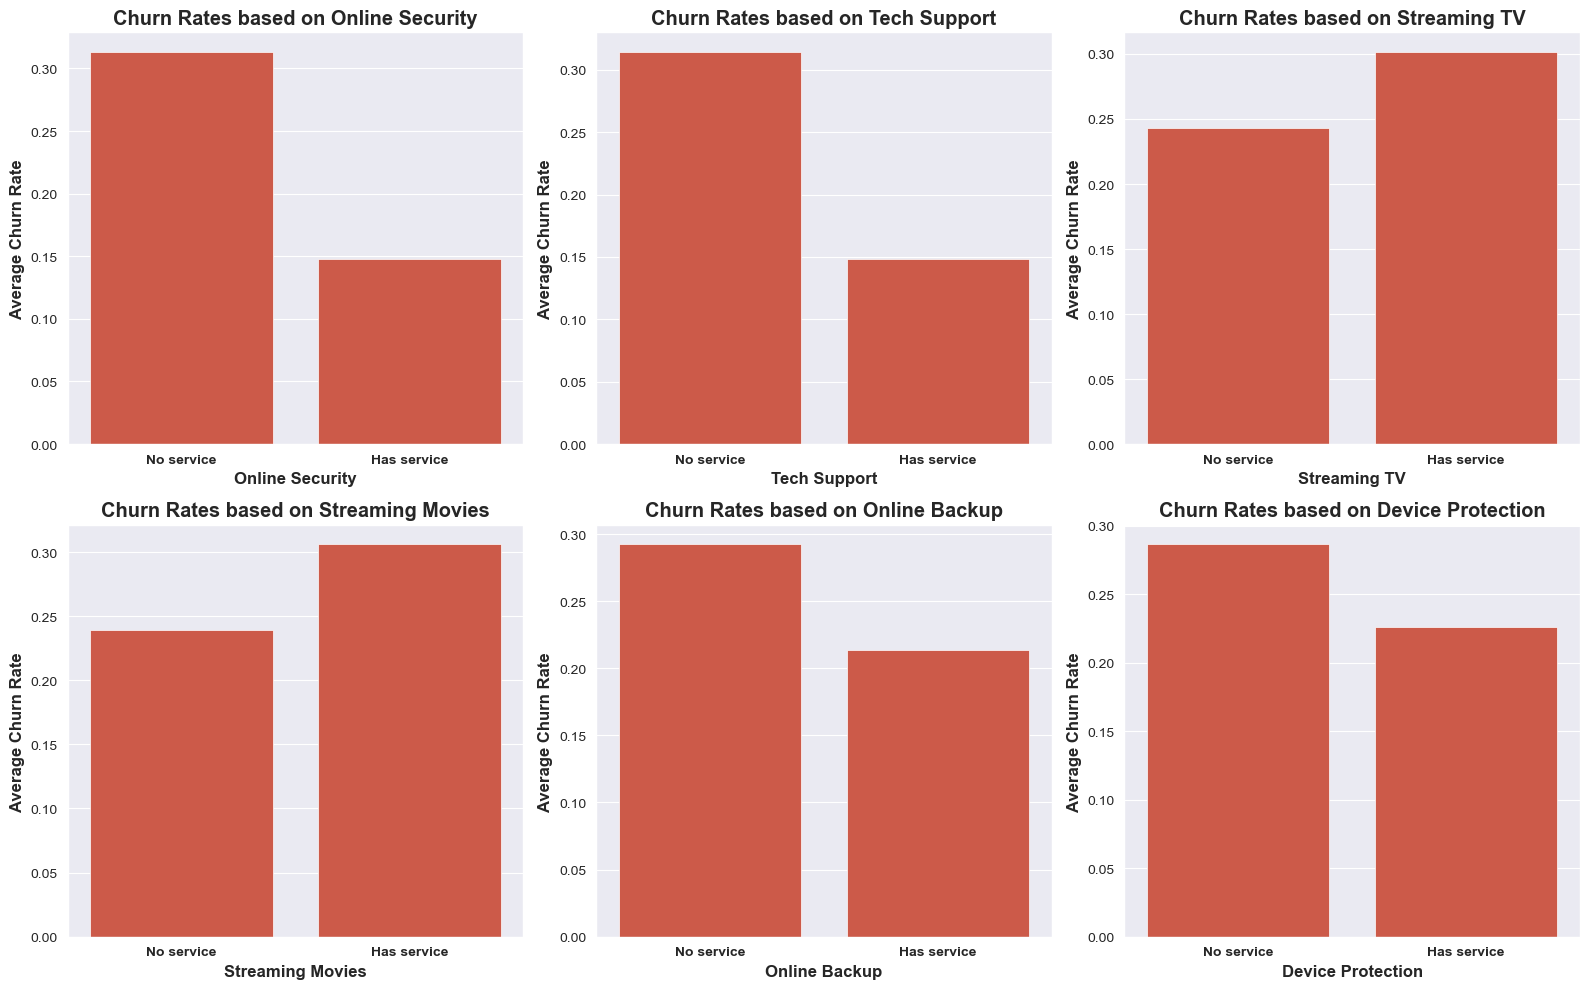

In [51]:
# Plot churn rates for each service
plt.figure(figsize=(16, 10))

plt.subplot(231)
sns.barplot(x=churn_rates_by_OnlineSecurity.index, y=churn_rates_by_OnlineSecurity.values)
plt.title('Churn Rates based on Online Security', weight='bold')
plt.xlabel('Online Security', weight='bold')
plt.ylabel('Average Churn Rate', weight='bold')
plt.xticks(weight='bold')

plt.subplot(232)
sns.barplot(x=churn_rates_by_TechSupport.index, y=churn_rates_by_TechSupport.values)
plt.title('Churn Rates based on Tech Support', weight='bold')
plt.xlabel('Tech Support', weight='bold')
plt.ylabel('Average Churn Rate', weight='bold')
plt.xticks(weight='bold')

plt.subplot(233)
sns.barplot(x=churn_rates_by_StreamingTV.index, y=churn_rates_by_StreamingTV.values)
plt.title('Churn Rates based on Streaming TV', weight='bold')
plt.xlabel('Streaming TV', weight='bold')
plt.ylabel('Average Churn Rate', weight='bold')
plt.xticks(weight='bold')

plt.subplot(234)
sns.barplot(x=churn_rates_by_StreamingMovies.index, y=churn_rates_by_StreamingMovies.values)
plt.title('Churn Rates based on Streaming Movies', weight='bold')
plt.xlabel('Streaming Movies', weight='bold')
plt.ylabel('Average Churn Rate', weight='bold')
plt.xticks(weight='bold')

plt.subplot(235)
sns.barplot(x=churn_rates_by_OnlineBackup.index, y=churn_rates_by_OnlineBackup.values)
plt.title('Churn Rates based on Online Backup', weight='bold')
plt.xlabel('Online Backup', weight='bold')
plt.ylabel('Average Churn Rate', weight='bold')
plt.xticks(weight='bold')

plt.subplot(236)
sns.barplot(x=churn_rates_by_DeviceProtection.index, y=churn_rates_by_DeviceProtection.values)
plt.title('Churn Rates based on Device Protection', weight='bold')
plt.xlabel('Device Protection', weight='bold')
plt.ylabel('Average Churn Rate', weight='bold')
plt.xticks(weight='bold') 

plt.tight_layout()
plt.show()

Lack of additional services like Online security, Tech support, Online Backup, and Device Protection led to higher rates of customer churn. Clients Streaming Movies and TV had higher churn rate than those who had no those services. Probably they sought after affordable internet connectivity.

##### 5. Is there a correlation between the contract term (month-to-month, one year, two years) and churn rates? Are customers on long-term contracts less likely to churn compared to those on month-to-month contracts?

In [52]:
# Calculate churn rates for each contract term
#reset_index() function converts data into a DataFrame and enables visualization

churn_rates_by_contract = df.groupby('Contract')['Churn'].mean().reset_index()
churn_rates_by_contract

,Contract,Churn
0,Month-to-month,0.431487
1,One year,0.115750
2,Two year,0.024272


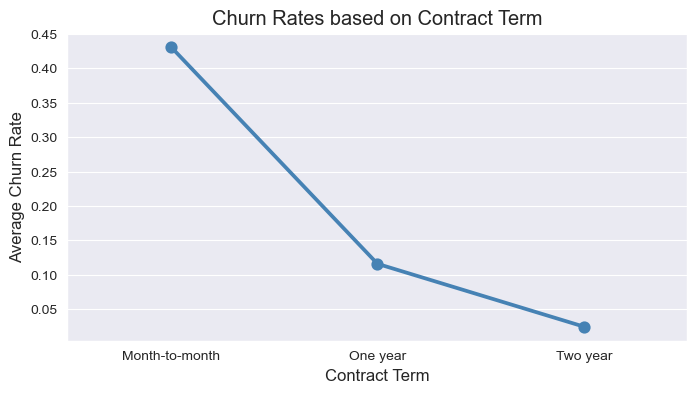

In [53]:
# Create a point plot
plt.figure(figsize=(8, 4))
sns.pointplot(data=churn_rates_by_contract, x='Contract', y='Churn', color='steelblue')
plt.title('Churn Rates based on Contract Term')
plt.xlabel('Contract Term')
plt.ylabel('Average Churn Rate')
plt.show();

Clients who subscribe to longer terms of contract have the lowest rate of attrition. The company should invest in means to attract customers to choose longer terms of contract.

In [54]:
#Convert 'Churn' column back to a category
df['Churn'] = df['Churn'].replace({0: 'No', 1: 'Yes'})

## 4. Feature Engineering

Feature engineering is the process of selecting, transforming, or creating new features from the raw data to improve the performance of machine learning models. It is a crucial step in the data preprocessing pipeline in data science and machine learning. Feature engineering involves converting the available data into a format that effectively represents the underlying patterns and relationships in the data, making it more suitable for training machine learning algorithms.

### Splitting of the dataset

Splitting dataset into training and evaluation sets

Use of train_test_split function from the sklearn.model_selection module

In [55]:
#Separation of features and target variable
#features 
X = df.drop(columns=['customerID', 'gender', 'Churn', 'Service_category_OnlineSecurity', 'Service_category_TechSupport', 'Service_category_StreamingTV',
                      'Service_category_StreamingMovies', 'Service_category_OnlineBackup', 'Service_category_DeviceProtection', 'tenure'], axis=1)

#target
y = df['Churn']

#Split dataset into training and evaluation sets (80% training, 30% evaluation)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
((X_train.shape, y_train.shape), (X_eval.shape, y_eval.shape), (test_data.shape))
#X contains the feature columns excluding the predefined
#y contains the target variable 'Churn'
#train_test_split function splits the dataset into training and evaluation test


(((3523, 18), (3523,)), ((1511, 18), (1511,)), (1995, 20))

In [56]:
#features in X train set
X.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'tenure_category'],
      dtype='object')

In [57]:
#feature in test data set
test_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

##### Preprocessing

I will create a new feature, namely, 'tenure_category', in the test data for consistency with the train data and to aid in modelling

I will also drop columns 'customerID', 'gender', and 'tenure' in the test_data for they did not have relationship wich churn. prediction

Creation of transformers for preprocessingc. Caategorical_transformer does transformation that is required to convert categorical data into a format suitable for ML algorithms.

Feature Scaling
I will Standardize or normalize numerical features to ensure that they have similar scales. 
This helps algorithms that rely on distance or magnitude, such as k-nearest neighbors and gradient descent-based methods.



In [58]:
#'Tenure' column contains the length of tenure in months
# Create bins for tenure categories (e.g., 0-6 months, 7-12 months, etc.)
test_tenure_bins = [0, 6, 12, 24, 36, 48, 60, 1000]  # Adjust the bins as needed
test_tenure_labels = ['0-6 months', '7-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '61+ months']
test_data['tenure_category'] = pd.cut(df['tenure'], bins=test_tenure_bins, labels=test_tenure_labels)

# Drop columns 'customerID', 'gender', and 'tenure' from test_data
columns_to_drop = ['customerID', 'gender', 'tenure']
test_data.drop(columns=columns_to_drop, inplace=True)

In [59]:
 #DROPPED COLUMNS
#'Service_category_OnlineSecurity', 'Service_category_TechSupport', 'Service_category_StreamingTV', 'tenure'
#'Service_category_StreamingMovies', 'Service_category_OnlineBackup', 'Service_category_DeviceProtection', 'gender'

#df has both numerical and categorical columns

# Identify categorical and numerical columns
categorical_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'OnlineBackup',  'DeviceProtection', 'TechSupport',
                          'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_category']

# ['Partner', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract',
#                     'PaperlessBilling', 'Dependents', 'SeniorCitizen', 'PaymentMethod', 'OnlineSecurity',
#                     'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'tenure_category']

numerical_cols = ['MonthlyCharges', 'TotalCharges']

# Define the transformers
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ],    # Specify remaining columns to be passed through without any transformation
    remainder='passthrough')   

In [60]:
#Fit and transform the training data using the preprocessor
#Preprocessing training set
X_train_transformed = preprocessor.fit_transform(X_train) 

#Transform the evaluation data using the preprocessor
X_eval_transformed = preprocessor.transform(X_eval) 

#Transform the test data using the preprocessor
test_data_transformed = preprocessor.transform(test_data) 


In [61]:
# Create DataFrames for the transformed datas
X_train_set = pd.DataFrame(X_train_transformed)
X_eval_test = pd.DataFrame(X_eval_transformed)
final_test1 = pd.DataFrame(test_data_transformed)

# Define the column names
numerical_features = ['MonthlyCharges', 'TotalCharges']

categorical_features = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'OnlineBackup',  'DeviceProtection', 'TechSupport',
                          'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_category']

# ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
#        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
#        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
#        'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_category']
       

# Add the column names to the DataFrame if available
if hasattr(preprocessor.named_transformers_['cat']['onehot'], 'get_feature_names_out'):
    # Get the one-hot encoded column names
    cat_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
    # Combine the categorical and numerical column names

    all_columns = list(cat_columns) + numerical_features
    X_train_set.columns = all_columns
    X_eval_test.columns = all_columns
    final_test1.columns = all_columns

In [62]:
X_train_set.head(10)

,SeniorCitizen_False,SeniorCitizen_True,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,...,PaymentMethod_Mailed check,tenure_category_0-6 months,tenure_category_13-24 months,tenure_category_25-36 months,tenure_category_37-48 months,tenure_category_49-60 months,tenure_category_61+ months,tenure_category_7-12 months,MonthlyCharges,TotalCharges
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.538505,-0.718672
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.525157,-0.674450
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.181444,-1.007641
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.171716,-0.652194
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.483727,-0.124794
5,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690903,-1.001104
6,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.473152,2.391681
7,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.506522,0.249729
8,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.721759,2.800710
9,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.187014,0.756297


In [63]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['SeniorCitizen', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod',
                                  'tenure_category']),
                                ('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['MonthlyCharges', 'TotalCharges'])])

In [64]:
X_train_set.columns

Index(['SeniorCitizen_False', 'SeniorCitizen_True', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No Internet Service', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No Internet', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No Internet',
       'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',

Balance Data
Balancing the data is important when you have imbalanced classes in a classification problem, meaning one class has significantly more samples than the other. Imbalanced data can lead to biased model training and inaccurate predictions, as the model may become biased towards the majority class. We have an imbalanced data as 74% of the total customers did not churn while 26% churned. this implies that we have to balance our data before training the model

In [65]:
#Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_set, y_train)

##### Training and evaluating machine learning model

In [66]:
#I have a preprocessed training data as well as an evaluation set ready for modelling
#preprocessed training data
(X_train_resampled.shape, y_train_resampled.shape)

((5176, 49), (5176,))

In [67]:
#preprocessed evaluation set 
(X_eval_test.shape, y_eval.shape)

((1511, 49), (1511,))

### Models Chosen

Will train and evaluate five models

#####  LogisticRegression
##### DecissionTreeClassifier
##### RandomForestClassifier
##### AdaBoostClassifier
##### XGBClassifier

#### 5. Model Building and Evaluation

In [68]:
#Empty list to store models
models_trained = []

Creation of model

Model 1

1. LOGISTIC REGRESSION Classifier

In [69]:
#LOGISTIC REGRESSION CLASSIFICATION
#Instantiate Model
lr = LogisticRegression(random_state=1)

In [70]:
lr.__str__()

'LogisticRegression(random_state=1)'

Train the Model

In [71]:
#training of model
lr.fit(X_train_resampled, y_train_resampled)

#model evaluation on evaluation set
y_eval_pred = lr.predict(X_eval_test)

#Store model trained in a list
models_trained.append(lr)

print(LogisticRegression())
print(classification_report(y_true=y_eval, y_pred=y_eval_pred))

LogisticRegression()
              precision    recall  f1-score   support

          No       0.91      0.76      0.82      1110
         Yes       0.54      0.78      0.64       401

    accuracy                           0.76      1511
   macro avg       0.72      0.77      0.73      1511
weighted avg       0.81      0.76      0.77      1511



Model 2

2. GradientBoostingClassifier

In [72]:
#Instantiate Model
gb = GradientBoostingClassifier(random_state=1)

In [73]:
gb.__str__()

'GradientBoostingClassifier(random_state=1)'

Train the Model

In [74]:
#training
gb.fit(X_train_resampled, y_train_resampled)

#model evaluation on evaluation set
y_eval_pred = gb.predict(X_eval_test)

#Store model trained in a list
models_trained.append(gb)

print(classification_report(y_true=y_eval, y_pred=y_eval_pred))


              precision    recall  f1-score   support

          No       0.87      0.84      0.86      1110
         Yes       0.60      0.66      0.63       401

    accuracy                           0.79      1511
   macro avg       0.74      0.75      0.74      1511
weighted avg       0.80      0.79      0.80      1511



Model 3

3. DecisionTreeClassifier

In [75]:
#Instantiate Model
dt = DecisionTreeClassifier(random_state=1)

In [76]:
dt.__str__()

'DecisionTreeClassifier(random_state=1)'

Train the Model

In [77]:
#training
dt.fit(X_train_resampled, y_train_resampled)

#model evaluation on evaluation set
y_eval_pred = dt.predict(X_eval_test)

#Store model trained in a list
models_trained.append(dt)

print(classification_report(y_true=y_eval, y_pred=y_eval_pred))

              precision    recall  f1-score   support

          No       0.83      0.79      0.81      1110
         Yes       0.49      0.55      0.51       401

    accuracy                           0.73      1511
   macro avg       0.66      0.67      0.66      1511
weighted avg       0.74      0.73      0.73      1511



Model 4

4. RandomForestClassifier

In [78]:
#Instantiate Model
rf = RandomForestClassifier(random_state=1)

In [79]:
rf.__str__()

'RandomForestClassifier(random_state=1)'

Train the Model

In [80]:
#training
rf.fit(X_train_resampled, y_train_resampled)

#model evaluation on evaluation set
y_eval_pred = rf.predict(X_eval_test)

#Store model trained in a list
models_trained.append(rf)

print(classification_report(y_true=y_eval, y_pred=y_eval_pred))

              precision    recall  f1-score   support

          No       0.84      0.88      0.86      1110
         Yes       0.62      0.54      0.57       401

    accuracy                           0.79      1511
   macro avg       0.73      0.71      0.72      1511
weighted avg       0.78      0.79      0.78      1511



Model 5

5. AdaBoostClassifier

In [81]:
#Instantiate Model
ab = AdaBoostClassifier(random_state=1)

In [82]:
ab.__str__()

'AdaBoostClassifier(random_state=1)'

Train the Model

In [83]:
#training of model
ab.fit(X_train_resampled, y_train_resampled)

#model evaluation on evaluation set
y_eval_pred = ab.predict(X_eval_test)

#Store model trained in a list
models_trained.append(ab)

print(classification_report(y_true=y_eval, y_pred=y_eval_pred,
                            # labels=None, target_names=None,
                             ))

              precision    recall  f1-score   support

          No       0.89      0.78      0.83      1110
         Yes       0.55      0.74      0.63       401

    accuracy                           0.77      1511
   macro avg       0.72      0.76      0.73      1511
weighted avg       0.80      0.77      0.78      1511



Model comparison

In [84]:
#from sklearn.metrics import accuracy_score

metric = accuracy_score  # Define the metric you want to use

info = [{"Model_Name": str(model),
         f"Metric ({metric.__name__})": metric(
             y_true=y_eval, y_pred=model.predict(X_eval_test),
            #pos_label="Yes" 
         )
         } for model in models_trained]  


In [85]:
info

[{'Model_Name': 'LogisticRegression(random_state=1)',
  'Metric (accuracy_score)': 0.7624090006618134},
 {'Model_Name': 'GradientBoostingClassifier(random_state=1)',
  'Metric (accuracy_score)': 0.7928524156187955},
 {'Model_Name': 'DecisionTreeClassifier(random_state=1)',
  'Metric (accuracy_score)': 0.7266710787557908},
 {'Model_Name': 'RandomForestClassifier(random_state=1)',
  'Metric (accuracy_score)': 0.7882197220383852},
 {'Model_Name': 'AdaBoostClassifier(random_state=1)',
  'Metric (accuracy_score)': 0.771674387822634}]

In [86]:
# Create a DataFrame from the info list
df_info = pd.DataFrame(info)

# Sort the DataFrame by the metric column in descending order
models_ranking = pd.DataFrame(df_info).sort_values(by=f"Metric ({metric.__name__})", ascending=False)

print(models_ranking)

                                   Model_Name  Metric (accuracy_score)
1  GradientBoostingClassifier(random_state=1)                 0.792852
3      RandomForestClassifier(random_state=1)                 0.788220
4          AdaBoostClassifier(random_state=1)                 0.771674
0          LogisticRegression(random_state=1)                 0.762409
2      DecisionTreeClassifier(random_state=1)                 0.726671


### Hyperparameter Tuning

Fine-tune the Top-k models (3 < k <5) using a Gridsearchcv/Randomsearchcv (that is in sklearn.model_selection) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

Tuning of top 3 models

Use of .get_params method to view model parameters

In [87]:
print((models_trained[1]).get_params())

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [88]:
#List to store best models after tuning
best_models_trained =[]

In [89]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the LabelEncoder on y_train_resampled and transform it
y_train_encoded = label_encoder.fit_transform(y_train_resampled)

# Fit the LabelEncoder on y_eval_resampled and transform it
y_eval_encoded = label_encoder.fit_transform(y_eval)

Model 1

Hyperparameter Tuning of GradientBoosting model 

In [90]:
#model parameters

models_trained[1].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 1,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [91]:
# Define the parameter grid to search through
param_dist = {
    'loss': ['log_loss'],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [1, 2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 6],
    'subsample': [0.8, 0.9, 1.0]
}

# Create KFold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=1)


# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=models_trained[1],
    param_distributions=param_dist,
    n_iter=10,     # Number of random combinations to try
    cv=kf,         # Use KFold cross-validation
    scoring='accuracy',
    refit=True,
    verbose=3,     # Show the steps as output
    n_jobs=-1,
    random_state=1      # Use all available CPU cores
)

In [92]:
# Fit the RandomizedSearchCV to the data
random_search.fit(X_train_resampled, y_train_encoded)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2],
                                        'loss': ['log_loss'],
                                        'max_depth': [2, 4, 6, 8],
                                        'min_samples_leaf': [1, 2, 3, 6],
                                        'min_samples_split': [1, 2, 4, 6, 8],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=1, scoring='accuracy', verbose=3)

In [93]:
# Print the best hyperparameters and best score
print("Best Hyperparameters:", random_search.best_params_)
print()
print("Best Score:", random_search.best_score_)
print()
random_search.best_estimator_


Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_depth': 8, 'loss': 'log_loss', 'learning_rate': 0.2}

Best Score: 0.8579969410404192



GradientBoostingClassifier(learning_rate=0.2, max_depth=8, min_samples_leaf=2,
                           min_samples_split=8, random_state=1, subsample=0.8)

In [94]:
#Append the trained model to the trained list

best_models_trained.append(random_search.best_estimator_)

Model 2

Hyperparameter Tuning of RandomForestClassifier Model


In [95]:
models_trained[3].get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(random_state=1)>

In [96]:
#model parameters

models_trained[3].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [97]:
# Define the parameter distribution to search through
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 6, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
     'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

# Create KFold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=1)


# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=models_trained[3],
    param_distributions=param_dist,
    n_iter=5,     # Number of random combinations to try
    cv=kf,         # Use KFold cross-validation
    scoring='accuracy',
    refit=True,
    verbose=3,     # Show the steps as output
    n_jobs=-1, 
    random_state=1    # Use all available CPU cores
)

In [98]:
# Fit the RandomizedSearchCV to the data
random_search.fit(X_train_resampled, y_train_encoded)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(random_state=1), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=1, scoring='accuracy', verbose=3)

In [99]:
# Print the best hyperparameters and best score
print("Best Hyperparameters:", random_search.best_params_)
print()
print("Best Score:", random_search.best_score_)
print()
random_search.best_estimator_

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'entropy', 'bootstrap': True}

Best Score: 0.8574179769831943



RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=4,
                       n_estimators=300, random_state=1)

In [100]:
#Append the trained model to the trained list

best_models_trained.append(random_search.best_estimator_)

Model 3

Hyperparameter tuning of Adaboost classifier Model
    

In [101]:
models_trained[4]

AdaBoostClassifier(random_state=1)

In [102]:
models_trained[4].get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 1}

In [103]:
# Define the parameter grid to search through
param_dist = {
    'algorithm': ['SAMME', 'SAMME.R'],
    'learning_rate': [0.1, 0.3, 0.6, 0.9],
    'n_estimators': [50, 100, 150, 200],
}

# Create KFold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Create RandomizedSearchCV object with KFold cross-validation
random_search = RandomizedSearchCV(
    estimator=models_trained[4],
    param_distributions=param_dist,
    n_iter=10,       # Number of random combinations to try
    cv=kf,           # Use KFold cross-validation
    scoring='accuracy',
    refit=True,
    verbose=3,       # Show the steps as output
    n_jobs=-1, 
    random_state=1       # Use all available CPU cores
)

In [104]:
# Fit the RandomizedSearchCV to the data
random_search.fit(X_train_resampled, y_train_encoded)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.1, 0.3, 0.6, 0.9],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=1, scoring='accuracy', verbose=3)

In [105]:
# Print the best hyperparameters and best score
print("Best Hyperparameters:", random_search.best_params_)
print()
print("Best Score:", random_search.best_score_)
print()
random_search.best_estimator_

Best Hyperparameters: {'n_estimators': 200, 'learning_rate': 0.6, 'algorithm': 'SAMME.R'}

Best Score: 0.8384833902225207



AdaBoostClassifier(learning_rate=0.6, n_estimators=200, random_state=1)

In [106]:
#Append the trained model to the trained list

best_models_trained.append(random_search.best_estimator_)

Model Comparison

In [107]:
info_ = [{"Model_Name": str(model),
         f"Metric ({metric.__name__})": metric(
             y_true=y_eval_encoded, y_pred=model.predict(X_eval_test),
            #pos_label="Yes" 
         )
         } for model in best_models_trained]  


rank_f_models = pd.DataFrame(info+info_).sort_values(by=f"Metric ({metric.__name__})", ascending=False)
rank_f_models

,Model_Name,Metric (accuracy_score)
1,GradientBoostingClassifier(random_state=1),0.792852
3,RandomForestClassifier(random_state=1),0.788220
6,"RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=4,\n n_estimators=300, random_state=1)",0.788220
5,"GradientBoostingClassifier(learning_rate=0.2, max_depth=8, min_samples_leaf=2,\n min_samples_split=8, random_state=1, subsample=0.8)",0.784911
7,"AdaBoostClassifier(learning_rate=0.6, n_estimators=200, random_state=1)",0.782925
4,AdaBoostClassifier(random_state=1),0.771674
0,LogisticRegression(random_state=1),0.762409
2,DecisionTreeClassifier(random_state=1),0.726671


After hyperparameter tuning and re-evaluation of model performance on the evaluation set, the model with the best accuracy was Gradient boosting classifier with an accuracy of 80% on the evaluation dataset.

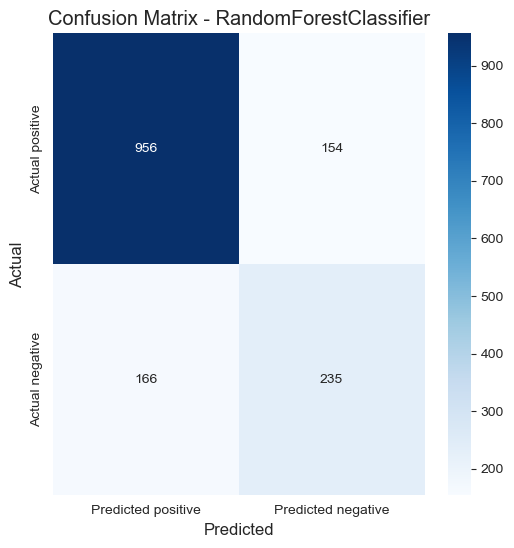

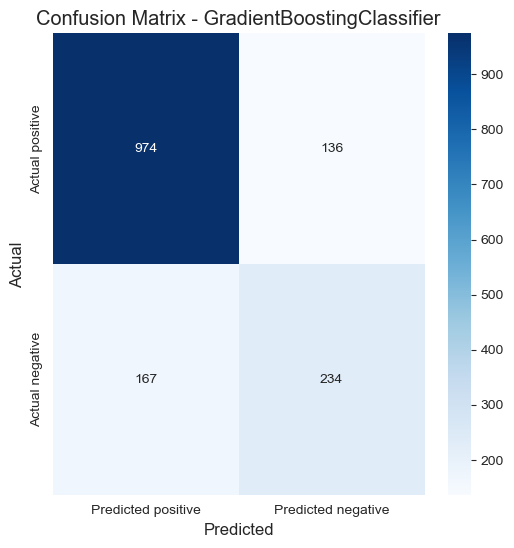

Model: RandomForestClassifier
Accuracy: 0.7882
Precision: 0.6041
Recall: 0.5860
F1 Score: 0.5949
F2 Score: 0.5896
Model: GradientBoostingClassifier
Accuracy: 0.7995
Precision: 0.6324
Recall: 0.5835
F1 Score: 0.6070
F2 Score: 0.5927


In [108]:
# defining the models with best parameters
best_models= [
RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=4, n_estimators=300, random_state=1),
GradientBoostingClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=150, random_state=1, subsample=0.9)
]

compare_models=[]
models = {}
accuracies = {}
precisions = {}
recalls = {}
f1_scores = {}
f2_scores = {}

# training and evaluating each model
for best_model in best_models:
    model_name= best_model.__class__.__name__ # Get the name of the classifier's class
    model = best_model.fit(X_train_resampled, y_train_encoded)
    y_pred = model.predict(X_eval_test)
    models[model_name] = model
    accuracies[model_name] = accuracy_score(y_eval_encoded, y_pred)
    precisions[model_name] = precision_score(y_eval_encoded, y_pred,) #pos_label='Yes')
    recalls[model_name] = recall_score(y_eval_encoded, y_pred,) #pos_label='Yes')
    f1_scores[model_name] = f1_score(y_eval_encoded, y_pred,)# pos_label='Yes')
    f2_scores[model_name] = fbeta_score(y_eval_encoded, y_pred, beta=2,)# pos_label='Yes')

    # Append the trained model to the list
    compare_models.append(model)

    # printing the model names and the scores of evaluation metrics
    cm = confusion_matrix(y_eval_encoded, y_pred)
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted positive', 'Predicted negative'], yticklabels=['Actual positive', 'Actual negative'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# printing the model names and the scores of evaluation metrics
for model_name in models.keys():
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracies[model_name]:.4f}")
    print(f"Precision: {precisions[model_name]:.4f}")
    print(f"Recall: {recalls[model_name]:.4f}")
    print(f"F1 Score: {f1_scores[model_name]:.4f}")
    print(f"F2 Score: {f2_scores[model_name]:.4f}")

In [109]:
total_instances = cm.sum()

print("Total Instances:", total_instances)

Total Instances: 1511


The scores of the two models on the evaluation dataset shows that the Gradient Boosting classifier has the highest accuracy of 79.81% while Random Forest classifier has an accuracy of 79.09%. The Random Forest model correctly predicted 956 instances as positive out of the 1110 instances and correctly predicted 239 instances as negative out of the 401 instances. on the other hand, Gradient boosting correctly predicted 970 instances as positive out of the 1110 instances and correctly predicted 236 instances as negative out of the 401 instances. Gradient boosting has predicted more instances in the positive class. Margin of difference in prediction of the negative class is insignificant between the two models when compared to the margin in the positive class. I therefore choose Gradient Boosting classifier as the best model for predicting customer churn as it provides a balances between predicting positive and negative instances, and also because of its high acccuracy score on the evaluation data.

Saving the model
Pickle is the standard way of serializing objects in Python. we will use the pickle operation to serialize our machine learning algorithm and save the serialized format to a file

In [110]:
best_models_trained[0]


GradientBoostingClassifier(learning_rate=0.2, max_depth=8, min_samples_leaf=2,
                           min_samples_split=8, random_state=1, subsample=0.8)

In [111]:
# saving our best model
Gradient_boosting_model = best_models_trained[0]
PATH = r'C:\Users\WORLDAX COMPUTERS\Python Projects\GRADIO_PROJECT\Gradient_boosting_model.pkl'
# Save the model to a file using pickle
with open(PATH, 'wb') as model_file:
    pickle.dump(Gradient_boosting_model, model_file)

#Creation of a pipeline to predict with best model

In [112]:
pipeline = Pipeline(steps=[("preprocessing", preprocessor), ("model", Gradient_boosting_model)])
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'tenure_category']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=8,
                                            min_samples_leaf=2,
                                            min_samples_split=8, random_state=1,
                                            subsample=0.8))])

In [113]:
#training of prediction pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'tenure_category']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=8,
                                            min_samples_leaf=2,
                                            min_samples_split=8, random_state=1,
                                            subsample=0.8))])

In [114]:
y_pred = pipeline.predict(X_eval)

accuracy = accuracy_score(y_eval, y_pred)
accuracy

0.7842488418266049

In [115]:
# fit the best model on the train data

# Make predictions on the test data
test_predictions = pipeline.predict(test_data)

test_predictions

array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [118]:
# Inverse transform output
encoded_labels = label_encoder.transform(test_predictions)
encoded_labels

array([1, 0, 0, ..., 1, 0, 0])

Above are predicted class labels for the test data based on the best-trained Gradient Boosting Classifier model.

Export Key Components
Here we export the important ML objects that will be used to develop an app: encoder, scaler, column transformer, models e.t.c

In [119]:
#Dictionary of objects to export
components= {
    'pipeline': preprocessor,
    'label_encoder': label_encoder,
    'model': Gradient_boosting_model,
    'prediction_pipeline': pipeline,
}

In [120]:
#path to the destination directory
destination = r"C:\Users\WORLDAX COMPUTERS\Python Projects\GRADIO_PROJECT"
# Construct the full file path
file_path = os.path.join(destination, "Gradio_toolkit.pkl")

# Save the components object as a pickled file
with open(file_path, "wb") as file:
    pickle.dump(components, file)

The "destination" represents path to the folder "export", which is the directory we want to create inside the current working directory. When we call os.path.join("destination"), it creates the full path to the "export" directory through the current working directory and creates the file "ml.pkl"

The code above is using the pickle.dump() function to save the serialized 'components' object to a binary file named "ml.pkl" inside the "export" directory. we can later load this object back into memory using pickle.load() to use the components data.

In [121]:
#!pip freeze > requirements.txt
#Exporting the requirements

requirements = "\n".join(f"{m.__name__}=={m.__version__}" for m in globals().values() if getattr(m, "__version__", None))

with open("requirements.txt", "w") as file:
    file.write(requirements)

the code above is used to create a text file named "requirements.txt" inside the "export" directory. This file will contain a list of all the installed Python packages and their versions in our environment.This file can be useful for recreating the same environment on another system or sharing the requirements of this project with others.